# CS 429: Information Retrieval

<br>

## Lecture 9: Evaluation

<br>

### Dr. Aron Culotta
### Illinois Institute of Technology 


---

Last time

- Scalable cosine similarity ranking

Today

- Is our search engine any good?

# Evaluation

- Your first day at Bing, your boss says "make our search engine better than Google's"


- How do you know when you're done?
- Maybe it's already better?

# How to measure goodness?

1. Relevant results
2. Speed (indexing and search)
3. Query capabilities
4. Pleasing user interface
5. User is *happy*?

# How to tell when the user is happy?

- They come back.
- They come back frequently.
- They take surveys and tell you they like you.


- We'll settle for measuring **relevance**.

# What is relevance?

A document is **relevant** if it addresses the user's information need.

What is **information need**?

- The user's information need is the explicit definition of what they are looking for.
- The query is only a proxy for that need.


- E.g. the **information need** may be "find a flight from Chicago to Detroit leaving tomorrow"
   - The **query** may be "ORD to DTW"

# How relevant are the results of your search engine?

- An **Information Retrieval Benchmark** consists of: 
  1. A documents collection.
  2. A set of queries (and corresponding information needs).
  3. A set of **relevance judgements** for each query-document pair (usually binary)

**Document collection:**

- Which documents?
- How many?

**Queries:**

- Which queries?
- How many?

Generally, want a diverse set of queries that people actually use, over a diverse set of documents that people actually read.

# Relevance judgements


- Who is making these judgements?
- How many do we need?
- How do we know they are right?

- Suppose we have 10M documents and 1K queries:
  - 10B relevance judgements??

- Crowd-sourcing can help, but not solve.
- Either consider small datasets (<10K docs)
- Or only judge a subset
  - E.g., only consider those documents in top $K$ by some reasonable baseline system

# Are the humans right?

- How do we know we can trust the human relevance judgements?

- Make multiple people label the same document.
- **Inter-annotator agreement:** How often do two humans agree on the label?

- E.g., consider two humans labeling 100 documents:

<table>
<tr><td> </td> <td> </td> <td colspan=2> **Person 1** </td> </tr>
<tr><td> </td> <td> </td> <td> Relevant </td> <td> Not Relevant </td> </tr>
<tr><td rowspan=2> **Person 2** </td> <td> Relevant </td> <td> 50 </td> <td> 20 </td> </tr>
<tr>                              <td> Not Relevant </td> <td> 10 </td> <td> 20 </td> </tr>
</table>


- Simple **agreement**: fraction of documents with matching labels. $\frac{70}{100} = 70\%$

- But, how much agreement would we expect by chance?

- Person 1 says Relevant $60\%$ of the time.
- Person 2 says Relevant $70\%$ of the time.
- Chance that they both say relevant at the same time? $60\% \times 70\% = 42\%$.


- Person 1 says Not Relevant $40\%$ of the time.
- Person 2 says Not Relevant $30\%$ of the time.
- Chance that they both say not relevant at the same time? $40\% \times 30\% = 12\%$.


- Chance that they agree on any document (both say yes or both say no): $42\% + 12\% = 54\%$



** Cohen's Kappa ** $\kappa$

- Percent agreement beyond that expected by chance

$ \kappa = \frac{P(A) - P(E)}{1 - P(E)}$

- $P(A)$ = simple agreement proportion
- $P(E)$ = agreement proportion expected by chance


E.g., $\kappa = \frac{.7 - .54}{1 - .54} = .3478$

- $k=0$ if no better than chance, $k=1$ if perfect agreement

# Assuming humans are right...

Given document collection, a query, and relevance judgements, what score do we give to our search engine?

- Assume search engine returns $K$ results


<table>
<tr> <td>                   </td>  <td> **Relevant**  </td>  <td> **Nonrelevant** </td> </tr>
<tr> <td> **Retrieved**     </td>  <td> true pos (**tp**)      </td>  <td> false pos (**fp**)   </td> </tr>
<tr> <td> **Not Retrieved** </td>  <td> false neg (**fn**)     </td>  <td> true neg (**tn**)    </td> </tr>
</table>

Example:


```
Rank    DocID    Relevant
----    -----    --------
1       123      Y
2       456      N
3       789      N
4       321      Y
5       654      N
```

Assume there are 10 relevant documents total and 100 documents in the collection.

<table>
<tr> <td>                   </td>  <td> **Relevant**  </td>  <td> **Nonrelevant** </td> </tr>
<tr> <td> **Retrieved**     </td>  <td> 2 (**tp**)      </td>  <td> 3 (**fp**)   </td> </tr>
<tr> <td> **Not Retrieved** </td>  <td> 8 (**fn**)     </td>  <td> 87 (**tn**)    </td> </tr>
</table>

**Accuracy:** $\frac{tp + tn}{tp + fn + fp + tn}$

e.g., $\frac{2 + 87}{2 + 8 + 3 + 87} = 89\%$

- Why is this a mostly useless measure?

Very few documents are relevant, so returning 0 documents has nearly perfect true negatives.

<table>
<tr> <td>                   </td>  <td> **Relevant**  </td>  <td> **Nonrelevant** </td> </tr>
<tr> <td> **Retrieved**     </td>  <td> 0 (**tp**)      </td>  <td> 0 (**fp**)   </td> </tr>
<tr> <td> **Not Retrieved** </td>  <td> 10 (**fn**)     </td>  <td> 90 (**tn**)    </td> </tr>
</table>

**Accuracy:** $\frac{tp + tn}{tp + fn + fp + tn}$

e.g., $\frac{0 + 90}{0 + 10 + 0 + 90} = 90\%$

# Precision and Recall


<table>
<tr> <td>                   </td>  <td> **Relevant**  </td>  <td> **Nonrelevant** </td> </tr>
<tr> <td> **Retrieved**     </td>  <td> true pos (**tp**)      </td>  <td> false pos (**fp**)   </td> </tr>
<tr> <td> **Not Retrieved** </td>  <td> false neg (**fn**)     </td>  <td> true neg (**tn**)    </td> </tr>
</table>

- **Precision:** $P = \frac{tp}{tp + fp}$,  The fraction of *returned* documents that are *relevant*.


- **Recall:** &nbsp;&nbsp;&nbsp; $R = \frac{tp}{tp + fn}$,  The fraction of *relevant* documents that are *returned*.

<table>
<tr> <td>                   </td>  <td> **Relevant**  </td>  <td> **Nonrelevant** </td> </tr>
<tr> <td> **Retrieved**     </td>  <td> 2 (**tp**)      </td>  <td> 3 (**fp**)   </td> </tr>
<tr> <td> **Not Retrieved** </td>  <td> 8 (**fn**)     </td>  <td> 87 (**tn**)    </td> </tr>
</table>


$P = \frac{tp}{tp + fp} = \frac{2}{2 + 3} = 40\%$

$R = \frac{tp}{tp + fn} = \frac{2}{2 + 8} = 20\%$


<table>
<tr> <td>                   </td>  <td> **Relevant**  </td>  <td> **Nonrelevant** </td> </tr>
<tr> <td> **Retrieved**     </td>  <td> 0 (**tp**)      </td>  <td> 0 (**fp**)   </td> </tr>
<tr> <td> **Not Retrieved** </td>  <td> 10 (**fn**)     </td>  <td> 90 (**tn**)    </td> </tr>
</table>

$P = \frac{tp}{tp + fp} = \frac{0}{0} = NaN \rightarrow 0\%$

$R = \frac{tp}{tp + fn} = \frac{0}{10} = 0\%$

How to combine precision and recall?

**Harmonic mean** of $P$ and $R$ is $\frac{1}{\frac{1}{P} + \frac{1}{R}}$

**Weighted harmonic mean:**  $\frac{1}{\alpha\frac{1}{P} + (1-\alpha)\frac{1}{R}}$

- Greater $\alpha \rightarrow$ precision is more important than recall

**F1:** Setting $\alpha=\frac{1}{2}$ leads to:  $\frac{2\cdot P \cdot R}{P + R}$

- **F1** commonly used; weights precision and recall equally


Why didn't we just use the arithmetic mean? ($\frac{P + R}{2}$)

Populating the interactive namespace from numpy and matplotlib


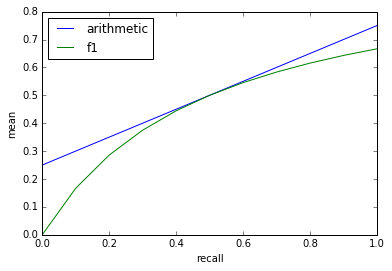

In [1]:
%pylab inline

# Compare arithmetic mean of precision and recall to F1 for fixed precision of 50%.

def arith_mean(p, r):
    return (p + r) / 2.0

def f1(p, r):
    return (2.0 * p * r) / (p + r)

p = .5
r = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]

xlabel('recall')
ylabel('mean')
plot(r, [arith_mean(p, ri) for ri in r], label='arithmetic')
plot(r, [f1(p, ri) for ri in r], label='f1')
legend(loc='best')

# Precision-Recall Curves

- Depending on use-case, precision or recall may be more important
  - Lawyer who cannot miss a single "smoking-gun" document needs 100% recall.
  - Average web user doesn't want **all** documents with the song lyrics she's searching for.
- Precision-recall curves displays results varying the number of returned documents

```
Rank    DocID    Relevant
----    -----    --------
1       123      Y
2       456      N
3       789      N
4       321      Y
5       654      N
```

Assume there are 10 relevant documents total and 100 documents in the collection.

$P = \frac{tp}{tp + fp} = \frac{2}{2 + 3} = 40\%$

$R = \frac{tp}{tp + fn} = \frac{2}{2 + 8} = 20\%$

```
Rank    DocID    Relevant
----    -----    --------
1       123      Y
2       456      N
3       789      N
4       321      Y
5       654      N
--
6       987      Y
7       135      N
8       246      N
9       357      N
10      468      N
```

<table>
<tr> <td>                   </td>  <td> **Relevant**  </td>  <td> **Nonrelevant** </td> </tr>
<tr> <td> **Retrieved**     </td>  <td> <del>2</del> &nbsp; 3 (**tp**)      </td>  <td> <del>3</del> &nbsp;&nbsp; 7 (**fp**)   </td> </tr>
<tr> <td> **Not Retrieved** </td>  <td> <del>8</del> &nbsp; 7 (**fn**)     </td>  <td> <del>87</del> &nbsp; 83 (**tn**)    </td> </tr>
</table>

$P = \frac{tp}{tp + fp} = \frac{3}{3 + 7} = 30\%$

$R = \frac{tp}{tp + fn} = \frac{3}{3 + 7} = 30\%$

(0, 1.1)

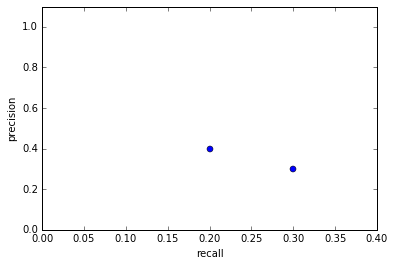

In [2]:
xlabel('recall')
ylabel('precision')
plot([.2, .3], [.4, .3], 'bo')
xlim((0, .4))
ylim((0, 1.1))

Precision and recall at each rank:

```
Rank    DocID    Relevant   P      R
----    -----    --------   ----   ----
1       123      Y          1.0    0.1
2       456      N          0.5    0.1
3       789      N          0.33   0.1  
4       321      Y          0.5    0.2
5       654      N          0.4    0.2
6       987      Y          0.5    0.3
7       135      N          0.43   0.3
8       246      N          0.375  0.3
9       357      N          0.33   0.3
10      468      N          0.3    0.3
```

(0, 1.1)

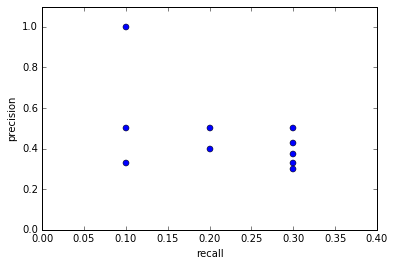

In [3]:
# compute precision/recall at each sublist of size 1 to 10
xlabel('recall')
ylabel('precision')
precisions = [1, .5, .33, .5, .4, .5, .43, .375, .33, .3]
recalls = [.1, .1, .1, .2, .2, .3, .3, .3, .3, .3]
plot(recalls, precisions, 'bo')
xlim((0, .4))
ylim((0, 1.1))

[1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.43, 0.375, 0.33, 0.3]


(0, 1.1)

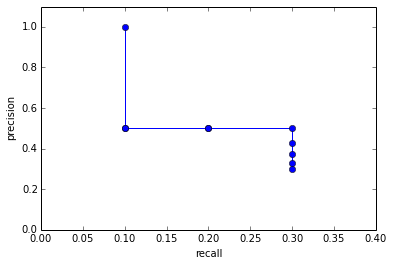

In [41]:
# Interpolated precision: max of precisions to right of value
xlabel('recall')
ylabel('precision')
interpolated_pre = [max(precisions[i:]) for i in range(len(precisions))]
print interpolated_pre
step(recalls, interpolated_pre, 'bo')
xlim((0, .4))
ylim((0, 1.1))

# Mean Average Precision (MAP)

- Average the precision values for top $k$ documents, considering only those elements where a relevant document is found.

|Rank|    DocID  |    Relevant |   P       |   R   |
|----|    -----  |    -------- |  ----     |  ---- |
| 1  |       123 |     Y       |   **1.0** |   0.1 |
| 2  |       456 |     N       |   0.5     |   0.1 |
| 3  |       789 |     N       |   0.33    |   0.1 |  
| 4  |       321 |     Y       |   **0.5** |   0.2 |
| 5  |       654 |     N       |   0.4     |   0.2 |
| 6  |       987 |     Y       |   **0.5** |   0.3 |
| 7  |       135 |     N       |   0.43    |   0.3 |
| 8  |       246 |     N       |   0.375   |   0.3 |
| 9  |       357 |     N       |   0.33    |   0.3 |
| 10 |       468 |     N       |   0.3     |   0.3 |

If relevant document not returned, assume 0 precision for those. So, if there are 10 relevant documents, MAP is:

$MAP=\frac{1.0 + 0.5 + 0.5 + 0 + \ldots + 0}{10} = .2$

If there are 5 relevant documents, MAP is:

$MAP=\frac{1.0 + 0.5 + 0.5 + 0 + \ldots + 0}{5} = .4$

# R-Precision

Precision considering the top $R$ documents, where $R$ is the number of relevant documents.

In our example, precision "at 10" ($P$@$10$) is $0.3$

Perfect system has $R$-precision of 1.0 (e.g., top $R$ results are all relevant)

# Labeling data is hard...

Up to now, we've assumed a human has annotated many documents by relevance.

Can we get this data with less effort?

For query $q$, the system returns

```
Rank    DocID
----    -----
1       123
2       456
3       789
```

Click-through data:

```
DocID   Clicks
-----   ------
123     1,000
456     500
789     100
```

Does this mean that users think document 123 is more relevant than document 456?

# Positional bias

Users are *a-priori* more likely to click a higher ranked document.

How can we compensate for this?

**Pairwise preferences:**

```
DocID   Clicks
-----   ------
123     1,000
456     500
789     5,000
```

Can probably conclude that 789 > 456 and 789 > 123
  - otherwise, user would have clicked the earlier link

How can we compute a score from this?

Let $L^*$ be the set of **true** pairwise preferences $\{d_i > d_j\}$

Let $L$ be the ranking produced by our system: $d_{123} > d_{456} > d_{789} \ldots$

Let $r_L(i, j)$ be 1 if ranking $L$ ranks $i$ before $j$.

**Kendall tau distance** is the number of pairwise disagreements: 

$\tau(L, L^*) = {\Big|}{\big \{}(i,j) $ s.t. $r_L(i, j) \ne r_{L^*}(i, j){\big \}}{\Big|}$

If perfectly matched: $\tau=0$; if perfectly mismatched: $\tau=\Big| L^* \Big|$

E.g., 

- true list &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$=[2, 1, 3]$
- predicted list $=$ $[1,2,3]$

- $L^*= (2>1,$ &nbsp; $ 2>3,$ &nbsp; $ 1>3)$
- $L$ &nbsp;&nbsp; $= (1>2,$ &nbsp; $ 1>3,$ &nbsp; $ 2>3)$
- $\tau(L, L^*) = \Big|(1,2)\Big| = 1$

# Interleaving rankings

Given two ranking systems A and B, which is better?

Interleave rankings from each, showing half with A first, half with B first.

Group 1: $A_1$, $B_1$, $A_2$, $B_2 \ldots$

Group 2: $B_1$, $A_1$, $B_2$, $A_2 \ldots$

E.g., if $A_1$ is clicked more than $B_1$ in Group 2, then A might be better than B.

# A/B Testing

A method of measuring the impact of a system parameter.

- E.g., Should I stem? What should the size of the champion list be? How should I tokenize?


<br><br>

To do A/B testing:


1. Create a search engine with millions of users.
2. Divert a small sample (1%) to the *experimental* search engine with that feature modified.
3. Measure difference in user happiness between groups.

- Happiness:
  - proportion of time first result is clicked
  - proportion of time top $k$ result is clicked  